<a href="https://colab.research.google.com/github/arclive202/COVID19proj/blob/master/CovidAnalytics_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing Analaytics on COVID-19 Dataset statewise and comparing them for different statistics.

Importing the packages required to run this notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
from google.colab import files
import folium


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Data Preprocessing

Setting up the Dataframe and the proceeding to clean the data. 

In [ ]:
india_data_url="https://www.mohfw.gov.in/data/datanew.json"
india_data = pd.read_json(india_data_url)
india_data.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,777,2904,2092,35,677,2945,2231,37,35
1,1,Andhra Pradesh,89516,361712,268828,3368,89932,371639,278247,3460,28
2,3,Arunachal Pradesh,880,3312,2427,5,899,3412,2508,5,12
3,4,Assam,19277,92619,73090,252,19518,94592,74814,260,18
4,5,Bihar,21392,123198,101292,514,19716,124536,104301,519,10


The last row contains the sum or aggregate of the data of all the states.
This Data can be stored in a separate variable for additional use.

In [ ]:
india_data.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype='object', name='state_name')

In [ ]:
india_data.tail(1)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
36,11111,,704348,3167323,2404585,58390,707267,3234474,2467758,59449,


In [ ]:
india_aggregate = india_data.iloc[-1]
print(india_aggregate)

sno               11111
state_name             
active           704348
positive        3167323
cured           2404585
death             58390
new_active       707267
new_positive    3234474
new_cured       2467758
new_death         59449
state_code             
Name: 36, dtype: object


We can now delete the final row from the dataframe so that it doesnot cause any anamoly in our data estimations

In [ ]:
india_data.drop(india_data.tail(1).index,inplace=True)

Now that the final row of the data has been deleted we can use the 'describe()' to get a general sense of the data we are dealing with

Remeber we have the aggregate values stored in a variable for later use.

In [ ]:
india_data.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,19.277778,19565.222222,87981.194444,66794.027778,1621.944444,19646.305556,89846.500000,68548.833333,1651.361111
std,10.843329,33333.079158,142958.479710,107491.476952,3921.501971,33097.473094,145498.533991,110240.553720,3980.216176
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,1341.250000,3613.500000,2419.250000,27.500000,1326.500000,3667.000000,2585.250000,28.500000
50%,19.500000,8933.000000,32040.000000,23037.500000,243.000000,9438.500000,32874.500000,23491.000000,252.000000
75%,28.250000,20638.250000,96631.750000,75858.250000,1158.250000,20111.000000,98866.000000,77416.250000,1199.750000
max,37.000000,168443.000000,693398.000000,502490.000000,22465.000000,166239.000000,703823.000000,514790.000000,22794.000000


As we can see from the above data that there are 36 rows accross all columns, and by looking at the rest of the data we can conclude that there are no NaN values in the dataset

We can now set the states column as an Index and proceed further to gather data of the max and min states from each category.

In [ ]:
india_data.set_index('state_name')

#The sno column is no use to us as well. So we might as well proceed and drop that column

india_data.drop(columns='sno',inplace=True)

In [ ]:
india_data.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,777,2904,2092,35,677,2945,2231,37,35
1,Andhra Pradesh,89516,361712,268828,3368,89932,371639,278247,3460,28
2,Arunachal Pradesh,880,3312,2427,5,899,3412,2508,5,12
3,Assam,19277,92619,73090,252,19518,94592,74814,260,18
4,Bihar,21392,123198,101292,514,19716,124536,104301,519,10


Loading CSV files which contains statewise latitudes and Longitudes for GeoSpatial Analysis

In [143]:
#Loaded the data of the 2011 statewise centroid, had to make adjustments to columns to factor in for the newly added states and union territories.
#files.upload()
# accepted filename: datasets_7536_10717_state wise centroids_2011.csv

In [ ]:
statewise_geodata = pd.read_csv("datasets_7536_10717_state wise centroids_2011.csv")
statewise_geodata.head()

,State,Longitude,Latitude
0,Andaman and Nicobar,92.889579,11.942373
1,Andhra Pradesh,79.916203,16.554124
2,Arunachal Pradesh,94.545327,27.725765
3,Assam,92.657310,26.321341
4,Bihar,85.636774,25.771394


Now that we have the statewise Latitudes and Longitudes, we need to see for any anamoly in the state names while comparing to the india_data dataframe.

Since the Data is different from the 2011 census data. The new states as well as the union territories data have to be explicitly added.

In [ ]:
india_data.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype='object', name='state_name')

In [ ]:
#Changing the Names to match with the india_data dataset

statewise_geodata.State[0] = 'Andaman and Nicobar Islands'
statewise_geodata.State[25] = 'Odisha'
statewise_geodata.State[33] = 'Uttarakhand'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
#Creating a list ranging from 0 to 36 which will be added as the index for our new list.

list1 = list(range(0,37))
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [ ]:
#appending two new rows to the statewisegeodata dataset
temp_states = statewise_geodata.append(pd.DataFrame([['Telangana',79.019300,18.112400],['Ladakh',77.577049,34.152588]], columns=['State','Longitude','Latitude']))
states_geo_data = temp_states.sort_values(by='State')

,State,Longitude,Latitude
0,Andaman and Nicobar Islands,92.889579,11.942373
1,Andhra Pradesh,79.740000,15.912900
2,Arunachal Pradesh,94.545327,27.725765
3,Assam,92.657310,26.321341
4,Bihar,85.636774,25.771394
5,Chandigarh,76.758725,30.742600
6,Chhattisgarh,82.125093,21.555739
7,Dadra and Nagar Haveli,73.094550,20.215132
8,Daman and Diu,72.411212,20.494570
9,Delhi,77.128045,28.645944


In [ ]:
#now that we have fixed the index issue from the previous output, we have a new dataframe with the data of all the states factored in
states_geo_data['ilist']=list1
states_geo_data.set_index('ilist',inplace=True)


In [ ]:
#Clubbing the data for Dadra and Nagar Haveli and Daman and Diu, which is a requirement specific to india_data dataframe.
covid_map_dat = states_geo_data.copy()
covid_map_dat.Latitude[7] = (covid_map_dat.Latitude[7] + covid_map_dat.Latitude[8]) / 2
covid_map_dat.Longitude[7] = (covid_map_dat.Longitude[7] + covid_map_dat.Longitude[8]) / 2
covid_map_dat.State[7]='Dadra and Nagar Haveli and Daman and Diu'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
#This is the final version of the Indian Lat and Longitude statewise data which is going to be used.

covid_map_dat

,State,Longitude,Latitude
ilist,,,
0,Andaman and Nicobar Islands,92.889579,11.942373
1,Andhra Pradesh,79.740000,15.912900
2,Arunachal Pradesh,94.545327,27.725765
3,Assam,92.657310,26.321341
4,Bihar,85.636774,25.771394
5,Chandigarh,76.758725,30.742600
6,Chhattisgarh,82.125093,21.555739
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851
9,Delhi,77.128045,28.645944


## Data Analytics

Now that we have finished with the preprocessing of the data, we can move further ahead with doing some analysis based off of some of our own criterias.

Total Number of Current Cases in India.

In [ ]:
print("The Total Number of Current cases in India are as follows:\nCurrent Active Cases:\t{0}\nTotal Number of Positives recorded:\t{1}\nTotal Number of people Cured:\t{2}\nTotal Number of deaths:\t{3}".format(india_aggregate['new_active'],india_aggregate['new_positive'],india_aggregate['new_cured'],india_aggregate['new_death']))

The Total Number of Current cases in India are as follows:
Current Active Cases:	707267
Total Number of Positives recorded:	3234474
Total Number of people Cured:	2467758
Total Number of deaths:	59449


In [ ]:
india_data.set_index('state_name',inplace=True)


1a. states sorted by order of current active 

1b. States were the number of active cases have increased.

1c. States were the number of active cases have decreased.

1d. Bar plot for the top ten states with Highest Active Cases.

In [ ]:
#1a.
india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head()
#print("\n\n")

state_name
Maharashtra       166239
Andhra Pradesh     89932
Karnataka          82429
Tamil Nadu         52128
Uttar Pradesh      49575
Name: new_active, dtype: int64

In [ ]:
#1b
temp_data = india_data.copy()
temp_data['Change in Active'] = temp_data['new_active'] - temp_data['active']

for v in temp_data.sort_values(by=['Change in Active'],ascending=False).index:
  if temp_data.loc[v]['Change in Active'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Active'])
  elif temp_data.loc[v]['Change in Active'] == 0:
    print("The number of active cases in ",v,"remains the same")




  

Telengana  increased by  1948
Karnataka  increased by  1199
Chhattisgarh  increased by  964
Kerala  increased by  909
Punjab  increased by  456
Jharkhand  increased by  433
Andhra Pradesh  increased by  416
Delhi  increased by  372
Jammu and Kashmir  increased by  298
Uttar Pradesh  increased by  287
Madhya Pradesh  increased by  281
Assam  increased by  241
Puducherry  increased by  228
Odisha  increased by  198
Uttarakhand  increased by  190
Tripura  increased by  163
Chandigarh  increased by  104
Gujarat  increased by  89
Goa  increased by  68
Ladakh  increased by  57
Haryana  increased by  47
Arunachal Pradesh  increased by  19
Mizoram  increased by  11
The number of active cases in  Lakshadweep remains the same


In [ ]:
#1c
for v in temp_data.sort_values(by=['Change in Active'],ascending=False).index:
  if temp_data.loc[v]['Change in Active'] < 0:
    print(v," decreased by ",str(temp_data.loc[v]['Change in Active']*-1))

Kerala  decreased by  7
Dadra and Nagar Haveli and Daman and Diu  decreased by  13
Sikkim  decreased by  20
Himachal Pradesh  decreased by  23
Uttarakhand  decreased by  34
Chandigarh  decreased by  37
Nagaland  decreased by  74
Arunachal Pradesh  decreased by  81
Andaman and Nicobar Islands  decreased by  87
Delhi  decreased by  152
Andhra Pradesh  decreased by  226
Tamil Nadu  decreased by  259
Goa  decreased by  302
Assam  decreased by  321
Punjab  decreased by  367
West Bengal  decreased by  375
Bihar  decreased by  1719
Karnataka  decreased by  2337
Maharashtra  decreased by  3416


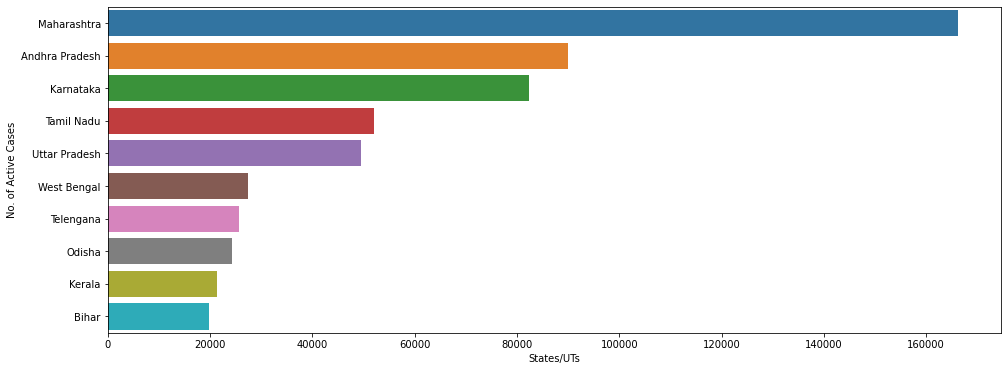

In [ ]:
#1d
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head(10),y=india_data.sort_values(by=['new_active'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Active Cases")
plt.show()

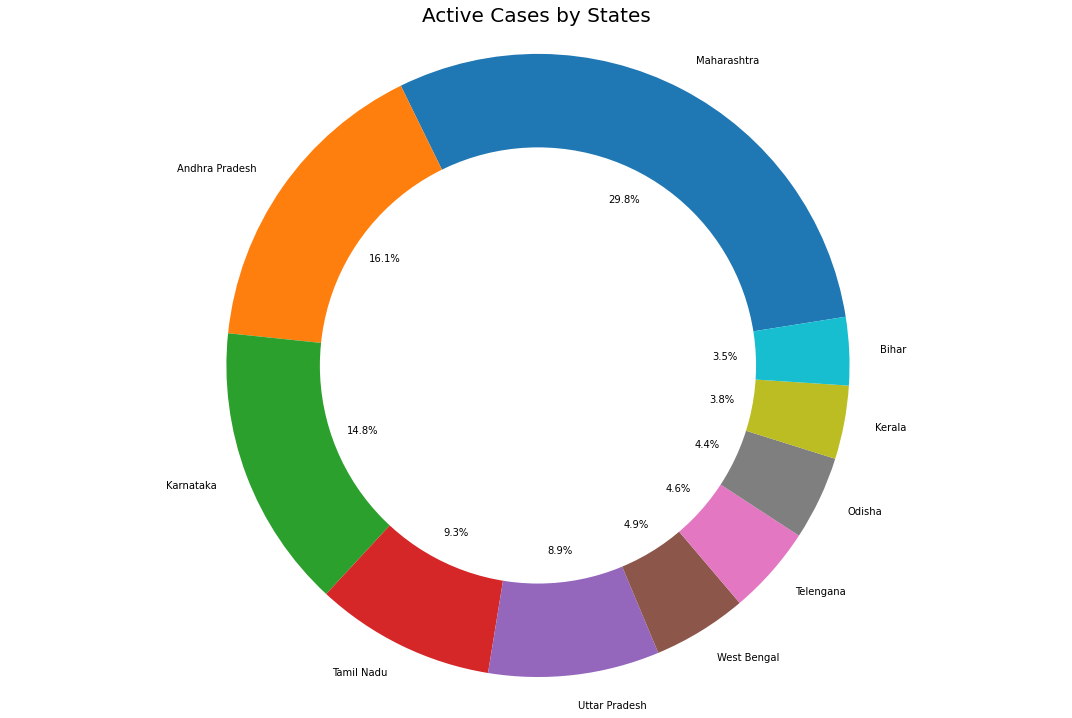

In [ ]:

labels = list(india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_active'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Active Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

2a. states sorted by order of current total Positives

2b. States were the number of Positive cases have increased.

2c. Bar plot for the top ten states with Highest Positive Cases.

In [ ]:
#2a
india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head()

state_name
Maharashtra       703823
Tamil Nadu        391303
Andhra Pradesh    371639
Karnataka         291826
Uttar Pradesh     197388
Name: new_positive, dtype: int64

In [ ]:
#2b
temp_data = india_data.copy()
temp_data['Change in Positive'] = temp_data['new_positive'] - temp_data['positive']

for v in temp_data.sort_values(by=['Change in Positive'],ascending=False).index:
  if temp_data.loc[v]['Change in Positive'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Positive'])
  elif temp_data.loc[v]['Change in Positive'] == 0:
    print("The number of Positive cases in ",v,"remains the same")




Maharashtra  increased by  10425
Andhra Pradesh  increased by  9927
Karnataka  increased by  8161
Tamil Nadu  increased by  5951
Uttar Pradesh  increased by  5006
Telengana  increased by  3018
West Bengal  increased by  2964
Odisha  increased by  2752
Kerala  increased by  2375
Assam  increased by  1973
Delhi  increased by  1544
Madhya Pradesh  increased by  1379
Rajasthan  increased by  1370
Bihar  increased by  1338
Punjab  increased by  1293
Chhattisgarh  increased by  1287
Haryana  increased by  1148
Gujarat  increased by  1114
Jharkhand  increased by  968
Jammu and Kashmir  increased by  701
Puducherry  increased by  567
Uttarakhand  increased by  485
Goa  increased by  392
Tripura  increased by  328
Chandigarh  increased by  174
Arunachal Pradesh  increased by  100
Ladakh  increased by  90
Manipur  increased by  82
Himachal Pradesh  increased by  53
Meghalaya  increased by  42
Andaman and Nicobar Islands  increased by  41
Nagaland  increased by  38
Sikkim  increased by  29
Dadra 

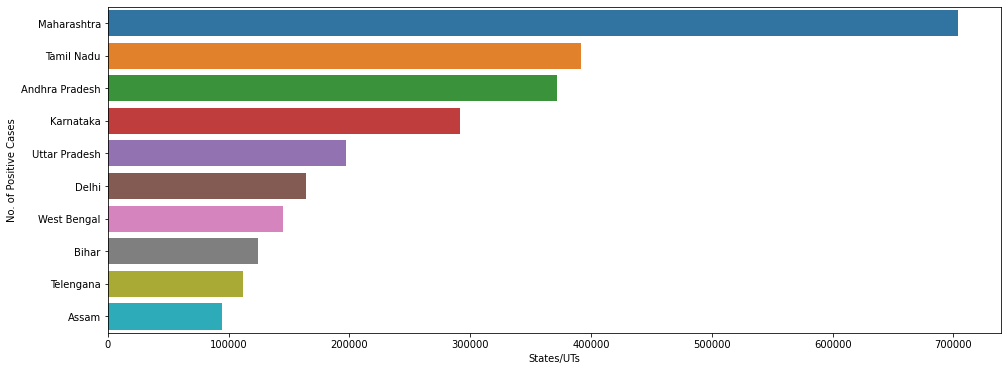

In [ ]:
#2c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head(10),y=india_data.sort_values(by=['new_positive'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Positive Cases")
plt.show()

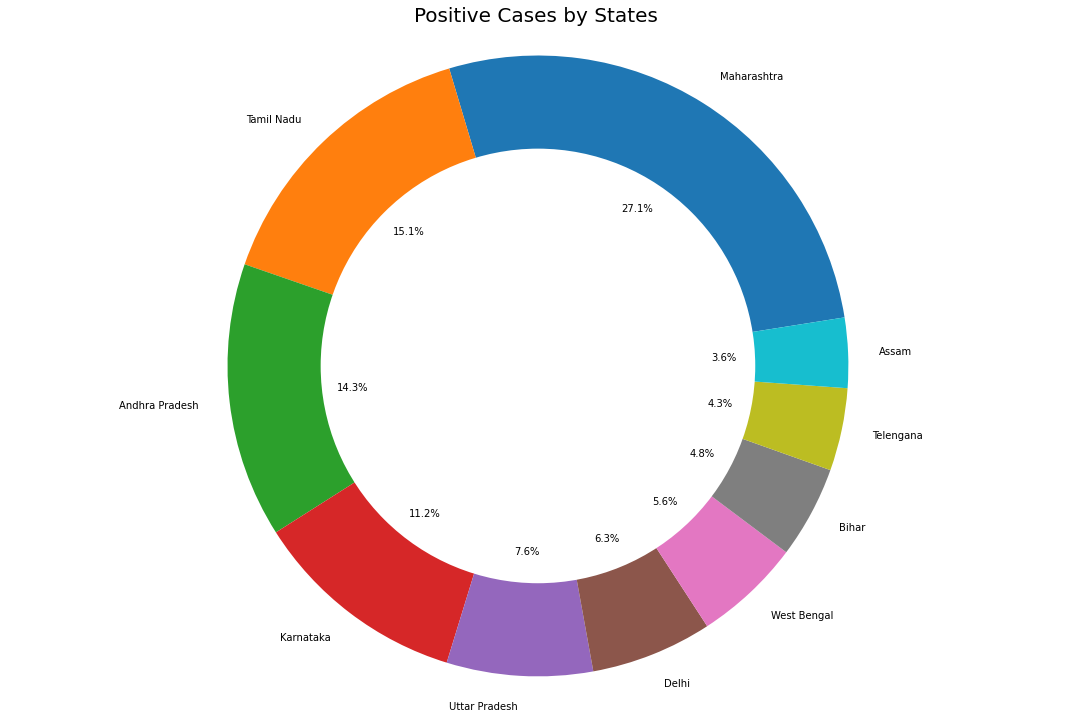

In [ ]:

labels = list(india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_positive'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Positive Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

3a. states sorted by order of current total number of people cured

3b. States were the number of people cured have increased.

3c. Bar plot for the top ten states with Highest number of people cured.

In [ ]:
#3a
india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head()

state_name
Maharashtra       514790
Tamil Nadu        332454
Andhra Pradesh    278247
Karnataka         204439
Delhi             147743
Name: new_cured, dtype: int64

In [ ]:
#3b
temp_data = india_data.copy()
temp_data['Change in Cured'] = temp_data['new_cured'] - temp_data['cured']

for v in temp_data.sort_values(by=['Change in Cured'],ascending=False).index:
  if temp_data.loc[v]['Change in Cured'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Cured'])
  elif temp_data.loc[v]['Change in Cured'] == 0:
    print("The number of Cured cases in ",v,"remains the same")




Maharashtra  increased by  12300
Andhra Pradesh  increased by  9419
Tamil Nadu  increased by  6998
Karnataka  increased by  6814
Uttar Pradesh  increased by  4647
West Bengal  increased by  3251
Bihar  increased by  3009
Odisha  increased by  2545
Assam  increased by  1724
Rajasthan  increased by  1526
Kerala  increased by  1456
Delhi  increased by  1155
Haryana  increased by  1091
Madhya Pradesh  increased by  1079
Telengana  increased by  1060
Gujarat  increased by  1005
Punjab  increased by  788
Jharkhand  increased by  518
Jammu and Kashmir  increased by  389
Puducherry  increased by  331
Goa  increased by  315
Chhattisgarh  increased by  308
Uttarakhand  increased by  289
Nagaland  increased by  215
Himachal Pradesh  increased by  164
Tripura  increased by  160
Andaman and Nicobar Islands  increased by  139
Sikkim  increased by  120
Manipur  increased by  98
Arunachal Pradesh  increased by  81
Chandigarh  increased by  67
Meghalaya  increased by  43
Dadra and Nagar Haveli and Dama

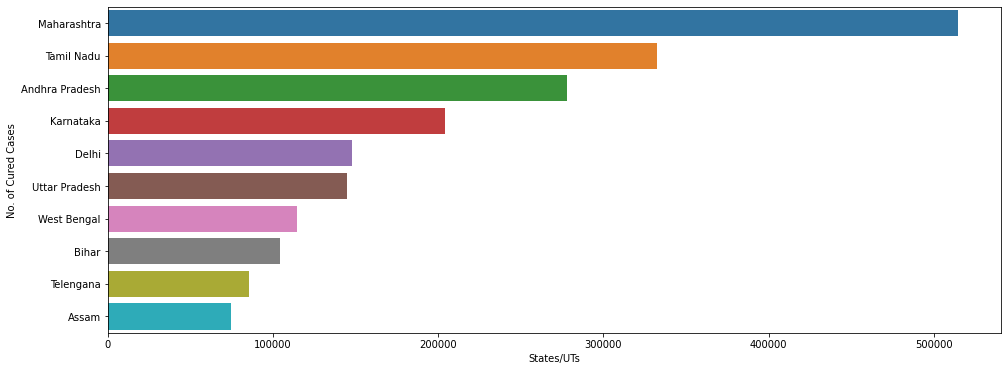

In [ ]:
#3c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head(10),y=india_data.sort_values(by=['new_cured'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Cured Cases")
plt.show()

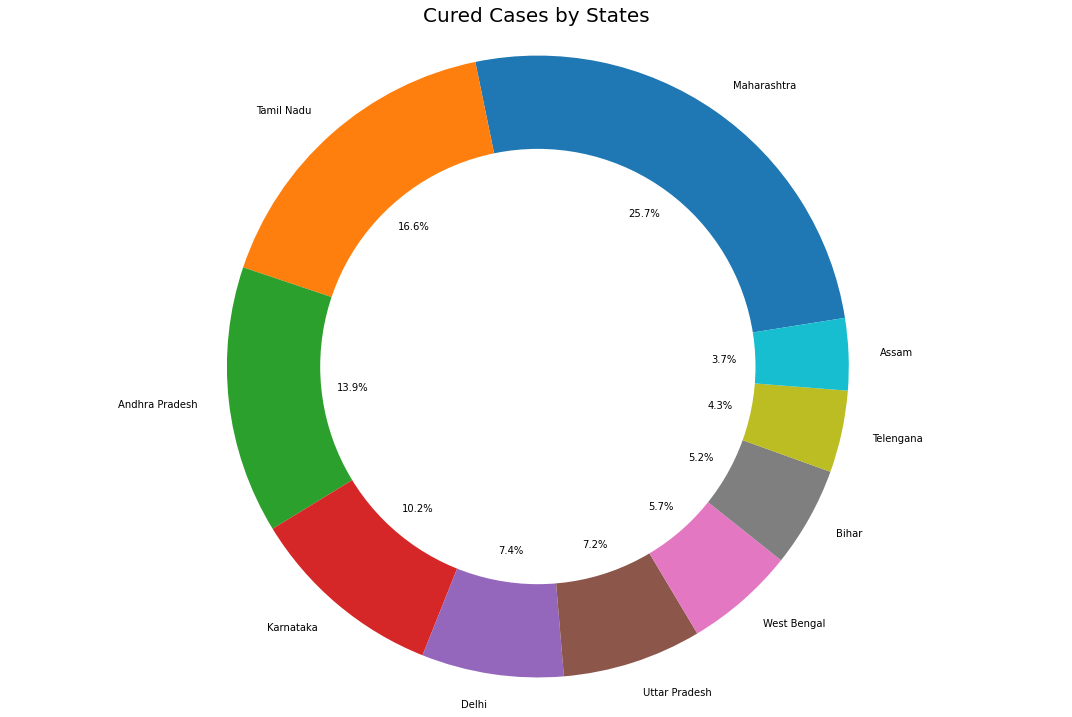

In [ ]:

labels = list(india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_cured'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cured Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

4a. states sorted by order of current total number of people who died

4b. States were the number of deaths have increased.

4c. Bar plot for the top ten states with Highest number of deaths.

In [ ]:
#4a
india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head()

state_name
Maharashtra       22794
Tamil Nadu         6721
Karnataka          4958
Delhi              4330
Andhra Pradesh     3460
Name: new_death, dtype: int64

In [ ]:
#4b
temp_data = india_data.copy()
temp_data['Change in Death'] = temp_data['new_death'] - temp_data['death']

for v in temp_data.sort_values(by=['Change in Death'],ascending=False).index:
  if temp_data.loc[v]['Change in Death'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Death'])
  elif temp_data.loc[v]['Change in Death'] == 0:
    print("The number of Deaths in ",v,"remains the same")




Maharashtra  increased by  329
Karnataka  increased by  148
Tamil Nadu  increased by  107
Andhra Pradesh  increased by  92
Uttar Pradesh  increased by  72
West Bengal  increased by  58
Punjab  increased by  49
Gujarat  increased by  20
Madhya Pradesh  increased by  19
Delhi  increased by  17
Jharkhand  increased by  17
Chhattisgarh  increased by  15
Jammu and Kashmir  increased by  14
Rajasthan  increased by  13
Haryana  increased by  10
Kerala  increased by  10
Telengana  increased by  10
Odisha  increased by  9
Goa  increased by  9
Puducherry  increased by  8
Assam  increased by  8
Uttarakhand  increased by  6
Bihar  increased by  5
Tripura  increased by  5
Chandigarh  increased by  3
Andaman and Nicobar Islands  increased by  2
Manipur  increased by  2
Ladakh  increased by  1
Himachal Pradesh  increased by  1
The number of Deaths in  Nagaland remains the same
The number of Deaths in  Mizoram remains the same
The number of Deaths in  Meghalaya remains the same
The number of Deaths in

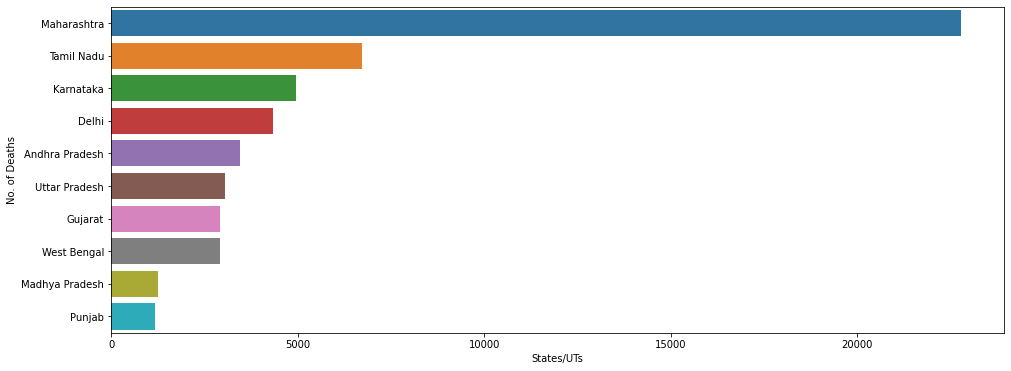

In [ ]:
#4c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head(10),y=india_data.sort_values(by=['new_death'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Deaths")
plt.show()

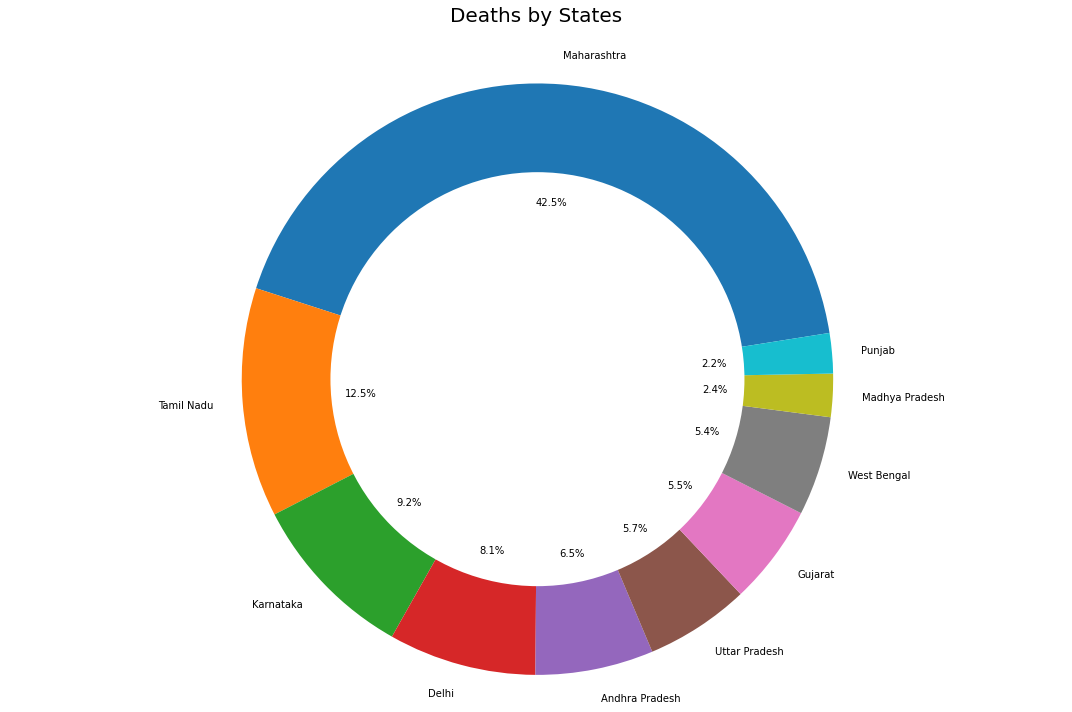

In [ ]:

labels = list(india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_death'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Deaths by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
india_data.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
state_name,,,,,,,,,
Andaman and Nicobar Islands,777,2904,2092,35,677,2945,2231,37,35
Andhra Pradesh,89516,361712,268828,3368,89932,371639,278247,3460,28
Arunachal Pradesh,880,3312,2427,5,899,3412,2508,5,12
Assam,19277,92619,73090,252,19518,94592,74814,260,18
Bihar,21392,123198,101292,514,19716,124536,104301,519,10


In [ ]:
input = "Karnataka"
india_data.loc[input]

active           81230
positive        283665
cured           197625
death             4810
new_active       82429
new_positive    291826
new_cured       204439
new_death         4958
state_code          29
Name: Karnataka, dtype: object

Now, Lets try and do some geo spatial analysis with our data

In [ ]:
dir(folium)

['Choropleth',
 'Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorLine',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'GeoJsonTooltip',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Polygon',
 'Popup',
 'Rectangle',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'Tooltip',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'absolute_import',
 'branca',
 'division',
 'features',
 'folium',
 'map',
 'print_function',
 'raster_layers',
 'sys',
 'utilities',
 'vector_layers',
 'warnings']

In [145]:
#adding new columns to the map data which are to be passed as parameters for the folium map

list2 = list(india_data["new_positive"])
list3 = list(india_data["new_cured"])
list4 = list(india_data["new_death"])

map_data["new_positive"]=list2
map_data["new_cured"]=list3
map_data["new_death"]=list4


In [155]:
map_data

,State,Longitude,Latitude,new_active
ilist,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677
1,Andhra Pradesh,79.740000,15.912900,89932
2,Arunachal Pradesh,94.545327,27.725765,899
3,Assam,92.657310,26.321341,19518
4,Bihar,85.636774,25.771394,19716
5,Chandigarh,76.758725,30.742600,1456
6,Chhattisgarh,82.125093,21.555739,9388
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381
9,Delhi,77.128045,28.645944,11998


In [163]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map1 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_active"].values[0]/2.5e3),
      popup="New Active Cases : %s"%stateval["new_active"].values[0],
      tooltip = stateval.State.values[0],
      color="blue",
      fill_color="blue").add_to(map1)

map1

In [164]:
map_data['new_positive']=list(india_data['new_positive'])

map_data


,State,Longitude,Latitude,new_active,new_positive
ilist,,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677,2945
1,Andhra Pradesh,79.740000,15.912900,89932,371639
2,Arunachal Pradesh,94.545327,27.725765,899,3412
3,Assam,92.657310,26.321341,19518,94592
4,Bihar,85.636774,25.771394,19716,124536
5,Chandigarh,76.758725,30.742600,1456,3209
6,Chhattisgarh,82.125093,21.555739,9388,23341
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381,2203
9,Delhi,77.128045,28.645944,11998,164071


In [173]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map2 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=6,min_zoom=2)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_positive"].values[0]/1e4),
      popup="New Positive Cases : %s"%stateval["new_positive"].values[0],
      tooltip = stateval.State.values[0],
      color="orange",
      fill_color="orange").add_to(map2)

map2

In [168]:
map_data['new_cured']=list(india_data['new_cured'])

map_data

,State,Longitude,Latitude,new_active,new_positive,new_cured
ilist,,,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677,2945,2231
1,Andhra Pradesh,79.740000,15.912900,89932,371639,278247
2,Arunachal Pradesh,94.545327,27.725765,899,3412,2508
3,Assam,92.657310,26.321341,19518,94592,74814
4,Bihar,85.636774,25.771394,19716,124536,104301
5,Chandigarh,76.758725,30.742600,1456,3209,1713
6,Chhattisgarh,82.125093,21.555739,9388,23341,13732
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381,2203,1820
9,Delhi,77.128045,28.645944,11998,164071,147743


In [170]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map3 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_cured"].values[0]/1e4),
      popup="New Cured Cases : %s"%stateval["new_cured"].values[0],
      tooltip = stateval.State.values[0],
      color="green",
      fill_color="green").add_to(map3)

map3

In [171]:
map_data['new_death']=list(india_data['new_death'])

map_data

,State,Longitude,Latitude,new_active,new_positive,new_cured,new_death
ilist,,,,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677,2945,2231,37
1,Andhra Pradesh,79.740000,15.912900,89932,371639,278247,3460
2,Arunachal Pradesh,94.545327,27.725765,899,3412,2508,5
3,Assam,92.657310,26.321341,19518,94592,74814,260
4,Bihar,85.636774,25.771394,19716,124536,104301,519
5,Chandigarh,76.758725,30.742600,1456,3209,1713,40
6,Chhattisgarh,82.125093,21.555739,9388,23341,13732,221
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381,2203,1820,2
9,Delhi,77.128045,28.645944,11998,164071,147743,4330


In [181]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map4 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  tip= stateval.State.values[0]+"\n"+str(stateval["new_death"].values[0])
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_death"].values[0]/5e2),
      popup="Number of Deaths : %s"%stateval["new_death"].values[0],
      tooltip = tip,
      color="red",
      fill_color="red").add_to(map4)

map4